In [1]:
from pdLDS import pdLDS

In [2]:
from generate import generateLorenz
import numpy as np
import torch
import matplotlib.pyplot as plt


# # generate_ramped_lorenz

# generate lorenz data
y, (true_y, true_x, true_D) = generateLorenz(T=1000, x0=np.array([-0.9,10,10]), noise_std=8)
y_ = (y-y.mean())/(y.std())
Y = [torch.tensor(y_).float()] 


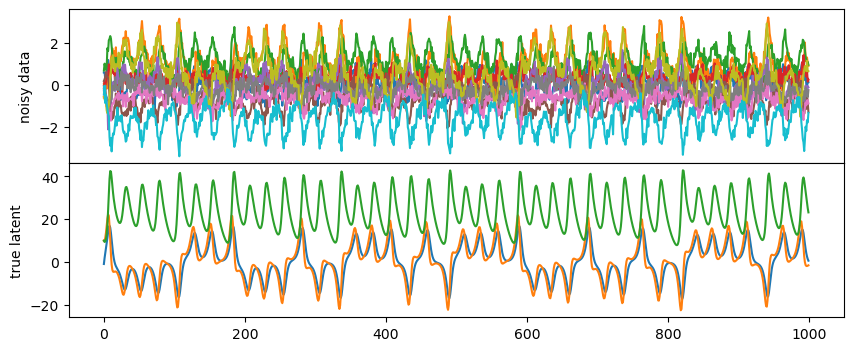

In [3]:
fig, axs = plt.subplots(2,1,figsize=(10,4))
axs[0].plot(Y[0])
axs[0].set_ylabel("noisy data")
axs[1].plot(true_x)
axs[1].set_ylabel("true latent")
plt.subplots_adjust(hspace=0)
plt.show()



In [4]:
M = 10
N = 3



dlds = pdLDS(M,  # size of measurement space
                           N, # size of latent space 
                           3, # number of dictionary elements 
                           S=85 # amount of smoothing for offset term. (0,1] where 0 is no smoothing, and 1 is smoothing across entire time series
                          )
dlds.fit(Y, 
         lr = 0.1, # learning rate for dynamics matrix
         C_lr = 0.05, #learning rate for observation matrix
         num_iters=50, 
         weight_decay=0.1, # controls amount of Frobrenius norm penalty on the dynamic's matrices.
         xi=100 # SBL-DF tradeoff factor
        )


TypeError: pdLDS.__init__() got an unexpected keyword argument 'S'

In [ ]:
fig, axs = plt.subplots(5,1,figsize=(10,7), sharex=True)

# axs[0].plot(true_x)
axs[0].plot((Y[0] @ torch.linalg.pinv(dlds.C ).T).data)
axs[0].set_ylabel("noisy x")
axs[1].plot(dlds.offsets[0] + dlds.latent[0])
axs[1].set_ylabel("x_smooth")
axs[2].plot(dlds.offsets[0])
axs[2].set_ylabel("Trend")
axs[3].plot(dlds.latent[0])
axs[3].set_ylabel("LDS")
axs[4].plot(dlds.coefs[0])
axs[4].set_ylim(-1,1)
axs[4].set_ylabel("inferred c")

plt.subplots_adjust(hspace=0)
plt.show()